# Neural Networks

In this discussion, we walk through the key principles behind neural networks. We will illustrate the algorithm conceptually, solidify that understanding with a mathematical derivation, and finally we will implement the model in code.

### Neural network feed-forward mechanism

The diagram below illustrates the basic architecture behind a neural network. We have a set of inputs denoted by _x_. These inputs are then fed to the hidden layer _Z_ through an activation by their corresponding weights, _w_. The hidden layer performs a transformation of the activation function using a nonlinear 'transfer function.' Subsequently, each of the hidden units is then passed through their own activation functions via the weights _v_. Lastly, the output, consisting of k-classes for a given observation, is then normalized so that the output for a given class represents the probability of that class for the given sample.

<img src="extras/NN.png" width="500" height="500" />

In this example of forward propagation, we can see that we move from the inputs to each hidden unit by taking the sigmoid of the activation function. 

\begin{align}
\ z_j = sigmoid\left(\sum_i(w_{ij}x_i)+b_j\right)
\end{align}

In the case of a binary output (two classes in the target variable), we could then also apply the sigmoid as we move from the hidden layer to the output.

$$ \ p(y\mid x) = sigmoid\left(\sum_j(v_jz_j)+c\right) $$

If we put the two parts together, we can represent the formula using matrix notation.

\begin{align}
\ y = \sigma(\sigma(XW+b)V+c)
\end{align}

where:
- σ(XW+b) = Z
- shape of X = N x D
- shape of W = D x M
- XW results in an N x M matrix
- D = number of input features
- M = number of hidden units
- K = number of classes
- N = number of samples

### Softmax for K classes

In the above example, we dealt with a binary outcome. However, when dealing more than two classes, we must employ the softmax function:

\begin{align}
\large p(y=k\mid x) = \frac{e^{a_k}}{\displaystyle\sum_je^{a_j}}
\end{align}

where, in our case,

\begin{align}
\ a_k = \sum_mV_{mk}Z_m
\end{align}

### Training a neural network through backpropagation

Having discussed the feed-forward mechanism of a neural network, we now get to the interesting part. In order to accurately update our weights using gradient descent, we have to move backwards through each layer of our network. In our case of a single hidden layer, we first have to update our hidden-layer-to-output weights, and then update the input-to-hidden-layer weights.

Our objective function can be expressed as:

\begin{align}
\large P(T \mid X,W,V) = \prod_{n=1}^N\prod_{k=1}^C (y_k^n)^{t_k^n}
\end{align}

where T represents our targets and X, W, and V are the components of our single-layer network. As we have discussed, our output is determined by the taking the softmax of the activation function:

\begin{align}
\ y_k = \text{softmax}(a_k)
\end{align}

where the activation function is:

\begin{align}
\ a_k = \sum_mV_{mk}Z_m
\end{align}

In this example we will take the log-likelihood of our objective function, meaning that we are trying to maximize this function.

\begin{align}
\large\ J = \sum_n\sum_kt_k^nlogy_k^n
\end{align}

#### Hidden layer to output

In the first phase, we are trying to find the optimal weights _V_ using gradient descent. We want to maximize the objective function with respect to the weights _V_, which results in the following use of the chain rule.

\begin{align}
\large \frac{\partial J}{\partial V_{mk}} = \frac{\partial J}{\partial y_k} \frac{\partial y_{k'}^n}{\partial a_k} \frac{\partial a_k}{\partial V_{nk}}
\end{align}

Let us first take the derivative of _J_ with respect to _y_.

\begin{align}
\large\frac{\partial J}{\partial y_k} = \sum_n\sum_{k'}t_{k'}^n\frac{1}{y_{k'}^n}
\end{align}

Now, given that _y_ is

\begin{align}
\large y_k = \frac{e^{a_k}}{\displaystyle\sum_je^{a_j}}
\end{align}

This means that the predicted probability of a given class actually depends on all the classes due to the summation below. This certainly complicates our derivative of _y_, because we must calculate the derivative for two scenarios: one where _k=k'_ and one where _k≠k'_. The full derivation is shown as the appendix of this document. What we get is: 

\begin{align}
\large \frac{\partial y_{k'}}{\partial a_k} = \left\{ {y_{k'}(1-y_{k'}) \text{  if  } k=k'}\atop {-y_{k'}y_k \text{  if  } k\neq k'}\right.
\end{align}

Using the Kronecker delta:

\begin{align}
\large \delta_{ij} = \left\{1 \text{  if  } i=j\atop {0 \text{  if  } i\neq j}\right.
\end{align}

We get:

\begin{align}
\large\frac{\partial y_{k'}}{\partial a_k} = y_{k'}(\delta_{kk'}-y_{k'})
\end{align}

The derivative of our activation function with respect to our weight is:

\begin{align}
\large \frac{\partial a_k}{\partial V_{mk}} = z_m^n
\end{align}

Putting our three derivatives together yields the equation below for the gradient of the weights _V_. The full derivation is shown in the appendix.

\begin{align}
\large \frac{\partial J}{\partial V_{mk}} = \sum_n(t_k^n-y_k^n)z_m^n
\end{align}

#### Inputs to hidden layer

Next, we proceed by calculating the derivative of the objective function with respect to the input weights _W_, which again forces us to implement the chain rule.

\begin{align}
\large\frac{\partial J}{\partial W_{dm}} = \frac{\partial J}{\partial z_m} \frac{\partial z_m}{\partial a_k} \frac{\partial a_k}{\partial W_{dm}}
\end{align}

The derivative of the objective function with respect to _z_ again relies on the softmax derivation, thus yielding:

\begin{align}
\large\frac{\partial J}{\partial z_m} = \sum_n(t_k^n-y_k^n)V_{mk}
\end{align}

Because the sigmoid is what we apply to our activation function, we know that our derivative is (see previous post on the logistic regression for details):

\begin{align}
\large\frac{\partial z_m}{\partial a_k} = z_m^n(1-z_m^n)
\end{align}

The derivative of our activation function simply _x_.

\begin{align}
\large\frac{\partial a_k}{\partial W_{dm}} = x_d^n
\end{align}

Putting it all together (note that _k_ is not on the left side - this is due to the 'total derivative' rule), the optimal weight _W_ can be obtained by following the gradient of this equation:

\begin{align}
\large\frac{\partial J}{\partial W_{dm}} = \sum_n\sum_k(t_k^n-y_k^n)V_{mk}z_m^n(1-z_m^n)x_d^n
\end{align}

One interesting observation regarding the gradient of the weights above is the summation term _k_, which illustrates that if we want to update our weights, we need to take into account the fact that a given weight affects all classes. Thus the error associated with the prediction of each class _backpropagates_ and is used to update the weights.

### Recursiveness in deeper networks

Let us briefly look at backpropagation in deeper neetworks. Here were have three hidden layers, and now we need to figure out how to optimize four different sets of weights.

<img src="extras/deeper_network.png" width="300" height="300" />

Starting from the output and working our way backward as we did before, first we calculate the derivative with respect to _W3_. For the sake of simplicity, we will assume that this is a one-sample case, thus yielding:

\begin{align}
\large\frac{\partial J}{\partial W^3_{sk}} = (t_k^n-y_k^n)z_s^3
\end{align}

Then, the weights that feed into the last hidden layer have already been shown to be:

\begin{align}
\large\frac{\partial J}{\partial W^2_{rs}} = \sum_n(t_k^n-y_k^n)W_{sk}^3z_s^3(1-z_s^3)z_r^2
\end{align}

Next, the derivative of the objective function with respect to _W1_ is:

\begin{align}
\large\frac{\partial J}{\partial W^1_{qr}} = \sum_n(t_k^n-y_k^n)W_{sk}^3z_s^3(1-z_s^3)W_{rs}^2z_r^2(1-z_r^2)z_q^1
\end{align}

As we can see, a clear pattern emerges as we backpropagate, and we see more and more repetition within each layer. 

### Coding example

We will now put our mathematical derivations into code in order to see them in action. As in our main example, we will only work with one hidden layer. Our target will have three classes, and our hidden layer will have three nodes.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)

# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in xrange(N):
    T[i, Y[i]] = 1

Let's take a look at our data so that we can visualize the problem we are trying to solve. As we can see, because we've made our clusters relatively close to each other, the overlap means that we don't expect to have a classification rate of 100%. 

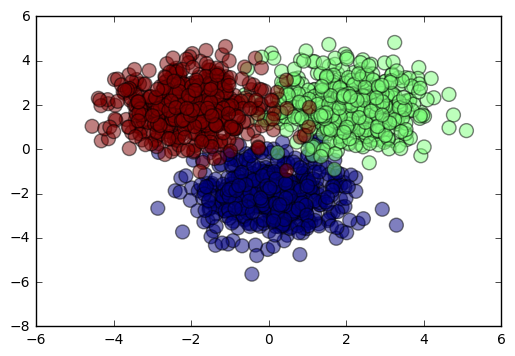

In [35]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

First, let's create our feed-forward mechanism. As you can see, we have also included bias terms for the input-to-hidden-layer and the hidden-layer-to-output activation functions.

In [36]:
def forward(X, W1, b1, V, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(V) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

Next, let us take the derivative with respect to the hidden-layer-to-output weights, _V_. Remember, we derived this and arrived at:

\begin{align}
\large \frac{\partial J}{\partial V_{mk}} = \sum_n(t_k^n-y_k^n)z_m^n
\end{align}

In [37]:
def derivative_v(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)
    ret4 = Z.T.dot(T - Y)
    return ret4

Likewise, our derivative for the input-to-hidden layer weights is:

\begin{align}
\large\frac{\partial J}{\partial W_{dm}} = \sum_n\sum_k(t_k^n-y_k^n)V_{mk}z_m^n(1-z_m^n)x_d^n
\end{align}

In [38]:
def derivative_w1(X, Z, T, Y, V):
    N, D = X.shape
    M, K = V.shape
    dZ = (T - Y).dot(V.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    return ret2

The derivative with respect to the hidden-layer-to-output bias is same as that of its corresponding weights, except minus the _Z_ term.

In [39]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

Similarly, derivative with respect to the input-to-hidden-layer bias is same as its corresponding weights, except minus the _X_ term.

In [40]:
def derivative_b1(T, Y, V, Z):
    return ((T - Y).dot(V.T) * Z * (1 - Z)).sum(axis=0)

Our objective function is the maximum log likelihood. Because we did not take its negative, we are now trying to maximize this function, meaning that we are actually performing gradient ascent, not descent.

In [41]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

To determine our classification rate, we use the variable _P_, which chooses our predicted class based on the highest probability of all the predicted classes (see gradient ascent section of code).

In [42]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

Before we begin our gradient ascent, we must first randomly initialize the weights.

In [51]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
V = np.random.randn(M, K)
b2 = np.random.randn(K)

Now we begin our gradient descent. We will choose a very low learning rate and go through a large number of epochs. For the sake of saving space, we will only print the metrics of ten of our epochs.

In [52]:
learning_rate = 10e-7
costs = []
for epoch in xrange(100000):
    output, hidden = forward(X, W1, b1, V, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        costs.append(c)
        if epoch % 10000 == 0:
            print "reward:", c, "classification_rate:", r
    # this is gradient ASCENT, not DESCENT
    W2 += learning_rate * derivative_v(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, V)
    b1 += learning_rate * derivative_b1(T, output, V, hidden)

reward: -2346.15122738 classification_rate: 0.333333333333
reward: -1057.57105891 classification_rate: 0.893333333333
reward: -1029.81577579 classification_rate: 0.92
reward: -1017.17586451 classification_rate: 0.920666666667
reward: -1009.43889392 classification_rate: 0.927333333333
reward: -1004.05504914 classification_rate: 0.928666666667
reward: -1000.0247314 classification_rate: 0.933333333333
reward: -996.862602647 classification_rate: 0.936666666667
reward: -994.299170911 classification_rate: 0.938666666667
reward: -992.170243232 classification_rate: 0.94


The output above and the chart below give us a good sense of how we our model performs over time. We can see that our reward (my way of saying 'opposite of cost') is continuing to increase (albeit minimally), meaning that we could probably add more epochs to improve our score. 

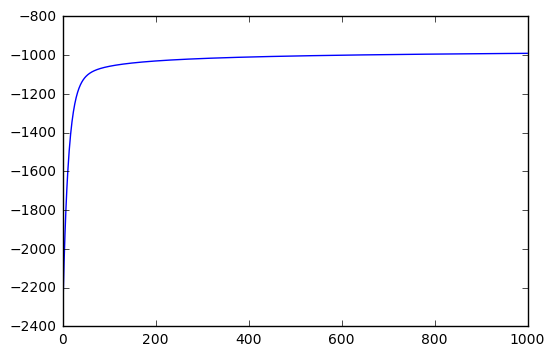

In [53]:
plt.plot(costs)
plt.show()

### Appendix

#### Softmax derivative

Given

\begin{align}
\large y_k = \frac{e^{a_k}}{\sum_je^{a_j}}
\end{align}

In the case where _k=k'_, we first must apply the product rule:

\begin{align}
\large \frac{dy_{k'}}{da_k} = \frac{de^{a_k}}{da_k}\frac{1}{\sum_{j=1}^Ke^{a_j}}+\frac{d\left[\sum_{j=1}^Ke^{a_j}\right]^{-1}}{da_k}e^{a_k}
\end{align}

\begin{align}
\large \frac{dy_{k'}}{da_k} = \frac{e^{a_k}}{\sum_{j=1}^Ke^{a_j}}-\left[\sum_{j=1}^Ke^{a_j}\right]^{-2}e^{a_k}e^{a_k}
\end{align}

\begin{align}
\large\frac{dy_k}{da_k} = y_k-y_k^2
\end{align}

Finally, we arrive at:

\begin{align}
\large y_k(1-y_k)
\end{align}

Where _k≠k'_:

\begin{align}
\large\frac{dy_k}{da_{k'}} = e^{a_k}\frac{d\left[\sum_{j=1}^Ke^{a_j}\right]^{-1}}{da_{k'}} =  e^{a_k}(-1) \left[\sum_{j=1}^Ke^{a_j}\right]^{-2}e^{a_{k'}}
\end{align}

\begin{align}
\large\frac{dy_k}{da_k'} = -\frac{e^{a_k}}{\left[\sum_{j=1}^Ke^{a_j}\right]}\frac{e^{a_{k'}}}{\left[\sum_{j=1}^Ke^{a_j}\right]}
\end{align}

\begin{align}
\large = -y_ky_{k'}
\end{align}

We can combine the two answers using the delta function. This gives us two possibilites, but only the latter is useful.

\begin{align}
\large\frac{dy_k}{da_{k'}} = y_k(\delta_{kk'}-y_{k'})
\end{align}

\begin{align}
\large\frac{dy_k}{da_{k'}} = y_{k'}(\delta_{kk'}-y_{k})
\end{align}

We now combine the latter formula with our derivative of _J_ with respect to _y_:

\begin{align}
\large\sum_{k'}^Kt_{k'}^n\frac{1}{y_{k'}^n}y_{k'}(\delta_{kk'}-y_{k})
\end{align}

\begin{align}
\large=\sum_{k'}^Kt_{k'}^n(\delta_{kk'}-y_{k})
\end{align}

\begin{align}
\large=\sum_{k'}^Kt_{k'}^n\delta_{kk'}-\sum_{k'}^Kt_{k'}^ny_{k}
\end{align}

Looking at the first term above, we recall that delta is equal to 1 only when _k=k'_ and zero otherwise, which allows us to get rid of the delta and the summation term, giving us:

\begin{align}
\large t_k^n-\sum_{k'}^Kt_{k'}^ny_{k}
\end{align}

Note also that _k'_ has become _k_ in the first term (by definition). We then move the _y_ to the front, as it doesn't depend on the summation.

\begin{align}
\large t_k^n-y_{k}\sum_{k'}^Kt_{k'}^n
\end{align}

And lastly, for a given range of classes, our target can only be equal to 1 for one of the classes, and, being zero for all other classes, that reduces the our equation to:

\begin{align}
\large t_k^n-y_k^n
\end{align}